In [1]:
import ROOT as rt
import time

Welcome to JupyROOT 6.28/00


In [2]:
#Start the timer
start = time.time()
#Open a file
file = rt.TFile("pyROOT_exercise1.root", "READ")

#Check the contents
file.ls()

TFile**		pyROOT_exercise1.root	
 TFile*		pyROOT_exercise1.root	
  KEY: TTree	tree;1	Exercise 1


In [3]:
#Get the TTree
tree = file.Get("tree")

#Print the tree Contents
tree.Print()

******************************************************************************
*Tree    :tree      : Exercise 1                                             *
*Entries :     1000 : Total =         8091637 bytes  File  Size =    7389598 *
*        :          : Tree compression factor =   1.09                       *
******************************************************************************
*Br    0 :px        : vector<float>                                          *
*Entries :     1000 : Total  Size=    2022699 bytes  File Size  =    1875419 *
*Baskets :       66 : Basket Size=      32000 bytes  Compression=   1.08     *
*............................................................................*
*Br    1 :py        : vector<float>                                          *
*Entries :     1000 : Total  Size=    2022699 bytes  File Size  =    1875755 *
*Baskets :       66 : Basket Size=      32000 bytes  Compression=   1.08     *
*...................................................

In [4]:
#Creating an 1D histogram to store the Transverse Momentum of the Particle with highest transverse momentum
histogram = rt.TH1F("pt_distribution", "Transverse Momentum Distribution", 100, 0, 10)

#Loop over events in the TTree
for event in tree:
    # Comment
    px = event.px
    py = event.py

    # Calculate Transverse momentum (pt) of all particles
    pt = []
    for i in range(len(px)):
        pt.append((px[i]**2 + py[i]**2)**0.5)
    
    #Sort the pt values in descending order
    sorted_pt = sorted(pt, reverse=True)
    
    histogram.Fill(sorted_pt[0])

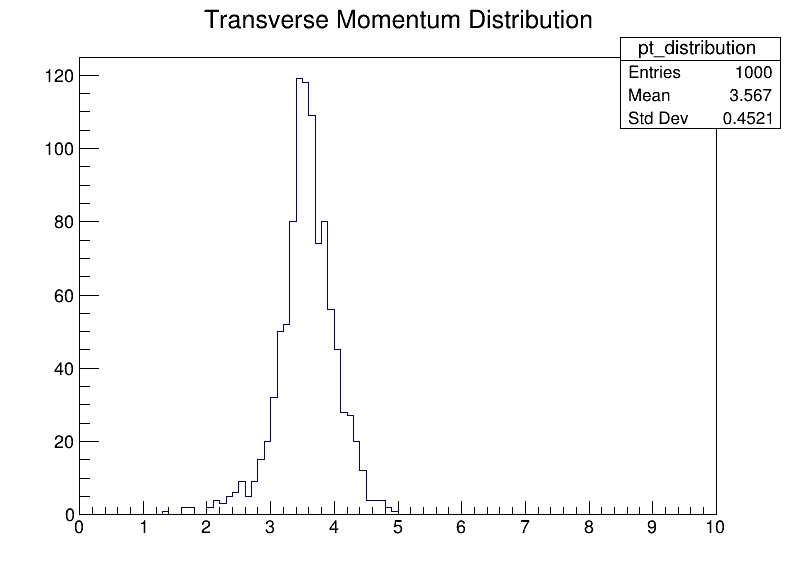

In [5]:
canvas = rt.TCanvas("canvas", "Transverse Momentum Distribution", 800, 600)

histogram.Draw()

#canvas.Update()

canvas.Draw()
#canvas.SaveAs("pt_distribution.png")

#file.Close()

# Let's try to decorate it

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


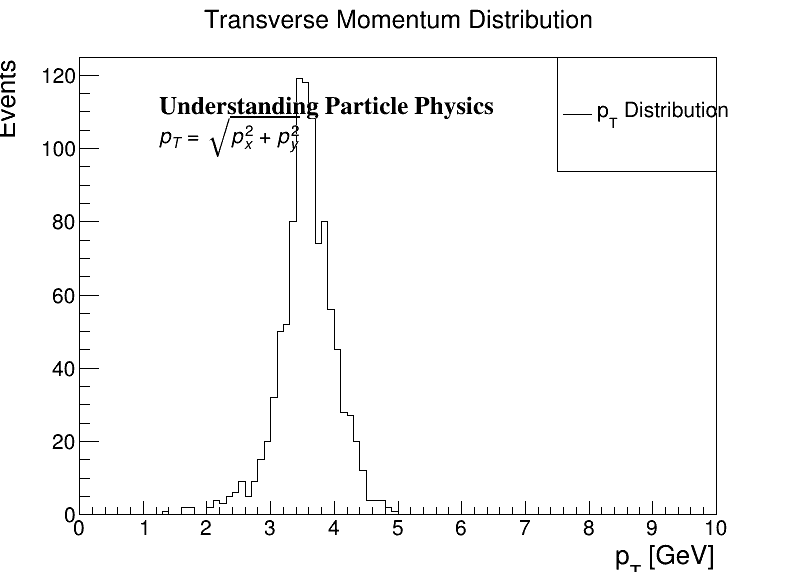

In [6]:
# Create a canvas and draw the histogram
canvas = rt.TCanvas("canvas", "Transverse Momentum Distribution", 800, 600)
histogram.Draw()
# Remove the statbox
histogram.SetStats(0)
# Set axis titles and labels
histogram.GetXaxis().SetTitle("p_{T} [GeV]")
histogram.GetYaxis().SetTitle("Events")
histogram.GetXaxis().SetLabelSize(0.04)
histogram.GetYaxis().SetLabelSize(0.04)
histogram.GetXaxis().SetTitleSize(0.05)
histogram.GetYaxis().SetTitleSize(0.05)

# Set line and marker styles
histogram.SetLineColor(rt.kBlack)
#histogram.SetMarkerColor(rt.kBlack) #Uncomment the line when using P option to draw
#histogram.SetMarkerStyle(rt.kFullCircle) #Uncomment the line when using P option to draw

# Set legend
legend = rt.TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(histogram, "p_{T} Distribution", "l")
legend.SetTextSize(0.04)
legend.Draw()

# Add text
text = rt.TLatex()
text.SetNDC()
text.SetTextFont(42)
text.SetTextSize(0.04)
text.DrawLatex(0.2, 0.8, "#scale[1.2]{#font[22]{Understanding Particle Physics}}")
text.DrawLatex(0.2, 0.75, "p_{T} = \\sqrt{p_{x}^{2} + p_{y}^{2}}")
canvas.Draw()

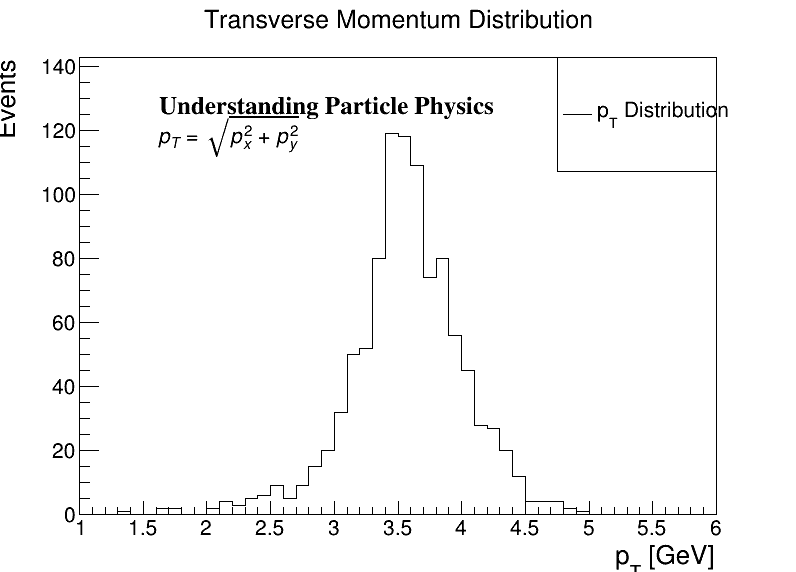

In [7]:
# Set plot range
histogram.GetXaxis().SetRangeUser(1, 6)
histogram.GetYaxis().SetRangeUser(0, 1.2 * histogram.GetMaximum())

canvas.Draw()